In [113]:
""" This is the Logistic Regression model for predicting depression during the
Busara Hackathon on 17th November 2018"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [114]:
data = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [115]:
# in order to view the first five datapoints in our data

data.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [116]:
# the shape of our data
data.shape

(1143, 75)

Evidently, the training set contains 75 columns and 1143 rows. For a good prediction model, alot of reliable features are needed so this is pretty good data. This also reduces the workload of having to do [feature engineering](http://en.wikipedia.org/wiki/Feature_engineering)

The only problem with our data set is that it has some missing values (NaN). This can be a problem since the model may not be able to perform classification appropriately. Although some algorithms will still work even with the data having missing values. So we must visualize in order to see how much missing values we are dealing with.My go-to library for visualization is Seaborn.

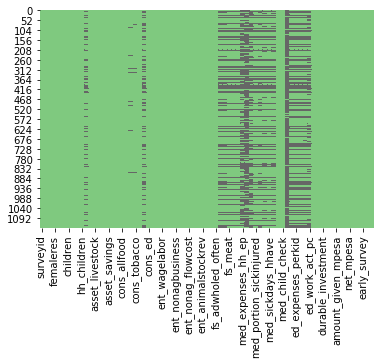

In [117]:
# data visualization
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='Accent')

Those are alot of missing values.

Some columns are actually missing more than half of the data ponts. This is not goooooood!!!

In [118]:
#describe the data to view the data's statistics
data.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1100.000000,1123.000000,1143.000000,724.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,727.000000,727.000000,809.000000,809.000000,809.000000,450.000000,265.000000,543.000000,809.000000,727.000000,720.000000,809.000000,720.000000,1143.0,1143.0,59.000000,680.000000,680.000000,680.000000,676.000000,572.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,128.407607,113.703653,148.571309,19.656758,10.254082,0.926868,0.000875,95.806020,8.323766,1.177717,0.634804,2.690428,1.829645,2.794807,3.647826,21.706431,0.186352,0.247594,0.107612,0.269466,0.032371,34.848492,17.321227,4.516265,1.866727,3.932084,21.414848,4.042870,0.910324,2.899587,0.440853,3.070457,0.274413,0.367120,5.626042,8.051863,3.722442,0.519817,0.496440,0.797353,1.955721,0.695412,1.0,1.0,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0.221347,24.356955,288.501084,34.463737,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,140.159957,239.698375,198.422016,28.053082,79.808523,1.663766,0.029579,114.487290,15.148661,6.740545,2.746150,12.141003,10.923501,8.331795,7.574917,28.397228,0.389561,0.431804,0.310025,0.443877,0.392355,257.963415,100.532226,8.626985,3.506706,12.199986,101.386778,6.246393,2.594545,5.274774,1.678111,2.205131,0.446494,0.482318,10.942463,17.940287,14.641253,0.321305,0.374030,0.330447,3.359077,0.375157,0.0,0.0,0.222380,117.267036,31.555958,0.341665,2.688571,0.837033,0.415336,798.985512,385.345212,134.058379,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.00000

**Data preprocessing**

*Is the process of transforming raw data to an understandable format.*
This is the most crucial process in any machine learning model. This part basically crunches down data format to the format that the machine can understand.

In [119]:
# splitting the survey_date to month, and day.
data['survey_date'] = pd.to_datetime(data['survey_date'])
data['month'] = data['survey_date'].dt.strftime('%m')
data['day'] = data['survey_date'].dt.strftime('%w')



In [120]:
data.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,month,day
0,926,91,2061-11-23,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5,11,3
1,747,57,2061-10-24,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3,10,1
2,1190,115,2061-10-05,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5,10,3
3,1065,97,2061-09-23,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0,09,5
4,806,42,2061-09-12,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3,09,1


In [121]:

# now drop the survey_date column and the surveyid since we do not need them for the training process.
s  = (['survey_date', 'surveyid'])
data = data.drop(s,axis=True)

In [122]:
data.head()

,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,month,day
0,91,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5,11,3
1,57,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3,10,1
2,115,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5,10,3
3,97,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0,09,5
4,42,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3,09,1


The next step is the part that differenciates most data scientists. This is where you are either to fill the missing datapoints with values or you decide to drop all the columns all together. 
        * Dropping the columns with missing values will reduce the number of features to use to train the model. This may lead to poor accuracy.
        * Filling the missing values may lead to the creation of artificial features. This will render the dataset useless and will hence not aid in the improvement of our accurecy.
        
        Tricky! right?? But i decided to fill the missing values.

In [123]:
# use the fillna method to fill the missing values with the mean value of the whole column.
data = data.fillna(data.mean())
data.head()

,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week,month,day
0,91,1,28.0,1,4,6,10,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5,11,3
1,57,1,23.0,1,3,5,8,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3,10,1
2,115,1,22.0,1,3,5,9,0,4.906057,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,1.829645,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.899587,0.440853,3.070457,0.274413,0.36712,5.626042,8.051863,3.722442,0.519817,0.49644,0.797353,1.955721,0.695412,1,1,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5,10,3
3,97,1,27.0,1,2,4,10,2,4.000000,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.000000,0.000000,3.000000,1.000000,1.00000,5.626042,8.051863,3.722442,0.000000,0.00000,0.797353,0.000000,0.695412,1,1,0.510452,20.179367,10.089684,0.500000,1.500000,0.000000,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0,09,5
4,42,0,59.0,0,4,6,10,4,6.000000,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.000000,0.000000,2.000000,0.000000,0.00000,5.626042,8.051863,1.233183,0.333333,0.25000,0.500000,1.166667,1.000000,1,1,0.510452,27.226130,6.806532,0.750000,1.750000,1.250000,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3,09,1


It worked pretty well but in case you would have wanted to drop the columns with missing values, you'd use the dropna()method. Sleeeeeek!!!

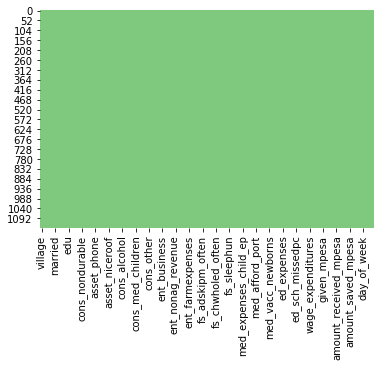

In [124]:
# visualize once more
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='Accent')

And Boooom!!! the training set has no missing values

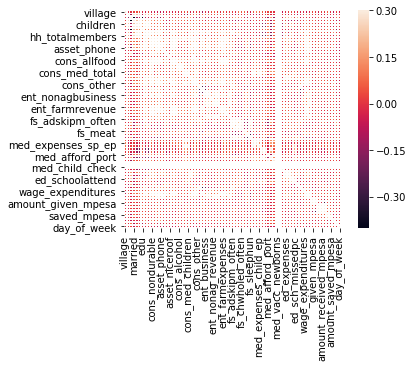

In [125]:
# perform some correlation in order choose the columns that will impact the accuracy of our model positively
corrr = data.corr()
sns.heatmap(corrr,square=True,linewidths=.9, vmax=.3)

Sincerely, from such a correlation plot, i cant choose. Am still working on how to plot correlation plots that are much more distinct. But anyway, lets move on to the training. Wuuuuuuuuuuu.. The cool part!

**Training the model**

In [126]:
#this is to check for the type of datatypes we are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
village                    1143 non-null int64
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            1143 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143 non-null float64
cons_ownfood               1143 non-null float64
cons_alcohol               

all the datatypes are good except for 2 which are objects. I think i need to convert them to integers by using the astype() method.

In [127]:
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

It's all good now

So in this particular model, i'll be using [Logistic Regression Algorithm](https://towardsdatascience.com/logistic-regression-b0af09cdb8ad) exclussively since this is a classic classification problem. I perfectly understand that some other models would give me better results here, but for purpose of education, i'm using logistic regression only.

Basically, logistic regression is the line **z = mx + b** where z is a sigmoid function. Learn [more](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)

In [128]:
# allocate x values to the model, which are all the values except the target value.
x = data.drop(['depressed'], axis=1)
# allocate the y values, which are the target values.
y = data.depressed

In [129]:
# use train_test_split for cross validation.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


The standard scaler basically converts all input data to a similar datatype. I actually didn't know that till now. cool!

In [131]:
# call the model
rf = LogisticRegression(C = 10000.0,random_state = 0)
# train
rf.fit(X_train_std, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

since our model has already trained, it's high time we saw how well we did. This is done by using metrics to know our error.

In [132]:
from sklearn.metrics import mean_absolute_error
pred_train = rf.predict(X_train_std)
print (mean_absolute_error(pred_train,y_train))

0.147024504084014


The error should be as close to 0 as possible. Ours ain't that bad right. In order to lower the error further, you could consider performing the correlation appropriately in order to get the number of impactful features. And definitely you could also use a Gradient Boosting algorithm or XGBoost.

**Testing the model and Predicting**

Unfortunately, I didnt perform testing and predictions on this notebook but i'll do it and i'll post the results. 
But you can try too.